In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Reading csv data from the A1_dataset folder and splitting it

In [9]:
microchips = pd.read_csv('A1_datasets/microchips.csv', header=None)

k_values = [1, 3, 5, 7]
xdata = microchips.iloc[:, 0]
ydata = microchips.iloc[:, 1]
train_labels = microchips.iloc[:, 2]
markers = {1: 'o', 0: 'x'}

TRAIN_data = np.array(microchips.iloc[:, :2].values)
TRAIN_labels = np.array(microchips.iloc[:, 2].values)
TEST_data = np.array([[-0.3, 1.0],
                      [-0.5, -0.1],
                      [0.6, 0.0]])

1. Plot the original microchip data using different markers for the two classes OK and Fail.

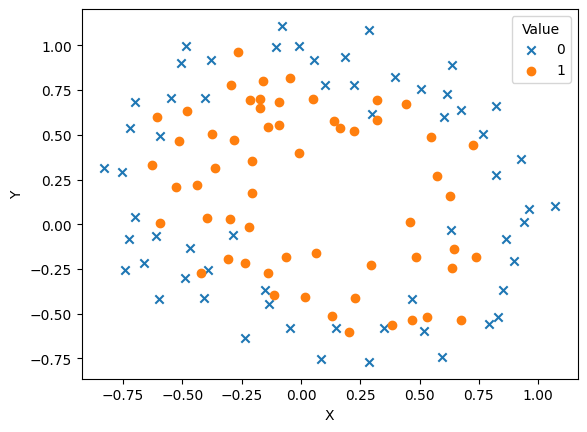

In [10]:
for value in set(train_labels):
    mask = value == train_labels
    plt.scatter(xdata[mask], ydata[mask], marker=markers[value], label=value)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Value')
plt.show()


2. Implement and use k-NN to predict whether three unknown microchips are likely to be OK
or Fail. The properties associated with the three unknown microchips are (−0.3, 1.0),(−0.5, −0, 1),
and (0.6, 0.0), and you should repeat the experiments for k = 1, 3, 5, 7. Hence, a total of
12 predictions.

In [26]:
def majority_vote(arr):
    count = np.bincount(arr)
    if len(count) > 1 and count[1] > count[0]:
        return 1
    else:
        return 0

def classify_x_test_and_print():
    distances = np.sqrt(np.sum((TEST_data[:, np.newaxis, :] - TRAIN_data) ** 2, axis=-1))
    position_indices = np.argsort(distances, axis=1)
    sorted_labels = TRAIN_labels[position_indices]
    for k_value in k_values:
        print("K value = {}".format(k_value))
        for i in range(len(TEST_data)):
            coords_str = ', '.join([f"{coord: 0.1f}" for coord in TEST_data[i]])
            if k_value == 1:
                closest_neighbour = sorted_labels[:, k_value - 1]
                label = "OK" if closest_neighbour[i] == 1 else "FAIL"
            else:
                closest_neighbour = sorted_labels[:, :k_value]
                prediction = majority_vote(closest_neighbour[i])
                label = "OK" if prediction == 1 else "FAIL"
            print(f"chip{i + 1}: [{coords_str}] ==> {label}")

classify_x_test_and_print()

K value = 1
chip1: [-0.3,  1.0] ==> OK
chip2: [-0.5, -0.1] ==> FAIL
chip3: [ 0.6,  0.0] ==> FAIL
K value = 3
chip1: [-0.3,  1.0] ==> FAIL
chip2: [-0.5, -0.1] ==> FAIL
chip3: [ 0.6,  0.0] ==> OK
K value = 5
chip1: [-0.3,  1.0] ==> FAIL
chip2: [-0.5, -0.1] ==> OK
chip3: [ 0.6,  0.0] ==> OK
K value = 7
chip1: [-0.3,  1.0] ==> FAIL
chip2: [-0.5, -0.1] ==> FAIL
chip3: [ 0.6,  0.0] ==> OK


3. Display a 2 × 2 plot similar to Figure 1 showing the decision boundary and the training
error for k = 1, 3, 5, 7.

In [27]:
# a function for calculating distances between the data points
# returns the array with all possible combinations of x and y values, and their corresponding 1 or 0 label
# depending on the K value and labels for these K points
def knn(minuend_data, subtrahend_data):
    distances = np.sqrt(np.sum((minuend_data[:, np.newaxis, :] - subtrahend_data) ** 2, axis=-1))
    sorted_indices = np.argsort(distances, axis=1)
    sorted_labels = TRAIN_labels[sorted_indices]
    array_full = np.zeros((len(distances), len(k_values) + 2))
    array_full[:, 0] = minuend_data[:, 0]
    array_full[:, 1] = minuend_data[:, 1]
    counter = 0
    for k_value in k_values:
        labels_temp = np.empty(len(distances))
        for i in range(len(distances)):
            if k_value == 1:
                closest_neighbour = sorted_labels[:, k_value - 1]
                label = 1 if closest_neighbour[i] == 1 else 0
            else:
                closest_neighbour = sorted_labels[:, :k_value]
                prediction = majority_vote(closest_neighbour[i])
                label = 1 if prediction == 1 else 0
            labels_temp[i] = label
        array_full[:, counter + 2] = labels_temp.flatten()
        counter = counter + 1
    return array_full

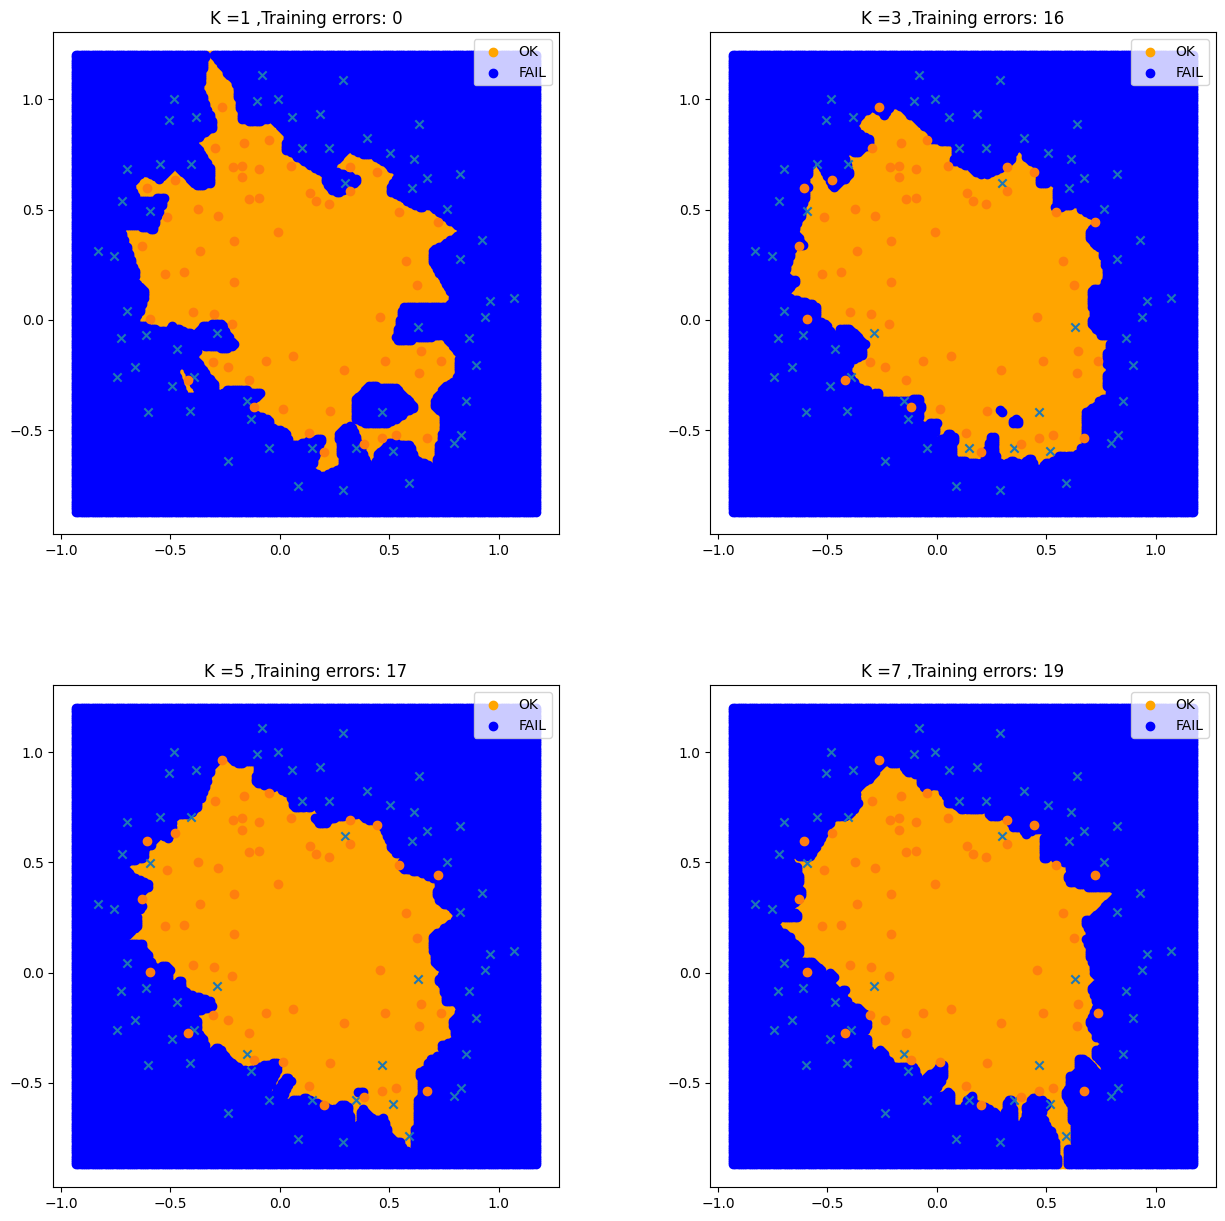

In [28]:
# creating a meshgrid array with max and min x and y values
x_min, x_max = TRAIN_data[:, 0].min() - 0.1, TRAIN_data[:, 0].max() + 0.1
y_min, y_max = TRAIN_data[:, 1].min() - 0.1, TRAIN_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xx_flat = xx.ravel()
yy_flat = yy.ravel()
meshgrid_array = np.column_stack((xx_flat, yy_flat))

full_array = knn(meshgrid_array, TRAIN_data)
distances_train_data = knn(TRAIN_data, TRAIN_data)

start_val = 2
starting_ax = 1
x = full_array[:, 0]
y = full_array[:, 1]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes = [ax1, ax2, ax3, ax4]
# plotting 2x2 scatter plots with different mesh points for different k values
for i, k in enumerate(k_values):
    knn = full_array[:, start_val]
    mask_knn_1 = knn == 1
    mask_knn_0 = knn == 0
    ax = axes[i]
    diff_array = np.not_equal(TRAIN_labels, distances_train_data[:, start_val])
    num_diff = np.sum(diff_array)
    ax.scatter(x[mask_knn_1], y[mask_knn_1], c="orange", label="OK")
    ax.scatter(x[mask_knn_0], y[mask_knn_0], c="blue", label="FAIL")
    for value in set(train_labels):
        mask = value == train_labels
        ax.scatter(xdata[mask], ydata[mask], marker=markers[value])
    ax.set_title("K =" + str(k) + " ,Training errors: "
                 + str(num_diff))
    ax.legend()
    start_val = start_val + 1
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()